In [26]:
#IMPORTING ALL LIBRARIES REQUIRED TO TRAIN MODEL
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

GENERATING DATASET USING make_blob

In [27]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101) #Generate isotropic Gaussian blobs for clustering.

Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

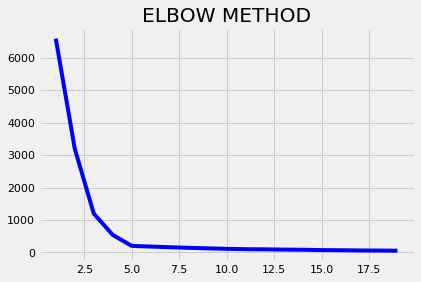

In [28]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

K means Clustering

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:
    
1) Specify number of clusters K.

2) Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.

3) Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
  
    3.1) Compute the sum of the squared distance between data points and all centroids.
   
    3.2) Assign each data point to the closest cluster (centroid).
   
    3.3) Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

The approach kmeans follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(X)

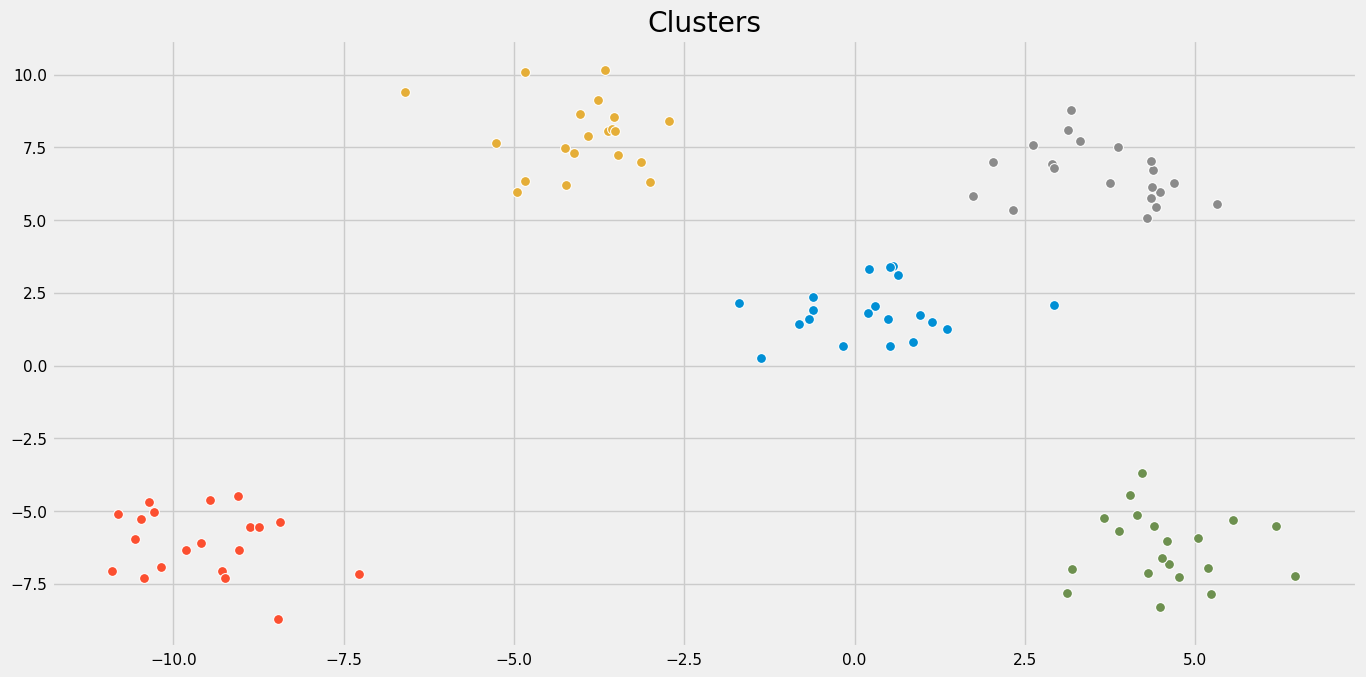

In [36]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50)
plt.title('Clusters')
plt.show()